# Week 3 - Feature Based Segmentation

In [3]:
import os
import sys
import cv2
import skimage.io
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.abspath(''), '..', '..'))
import toolbox
import imp
imp.reload(toolbox)

<module 'toolbox' from '/Users/williammarstrand/privat/DTU/Kandidat/1. Semester/Advanced Image Analysis/02506-advanced-image-analysis/exercises/week3/../../toolbox/__init__.py'>

### (A) Compute Features

1) Training image

In [4]:
train_img = skimage.io.imread(os.path.join('data', '2labels', 'training.png'))

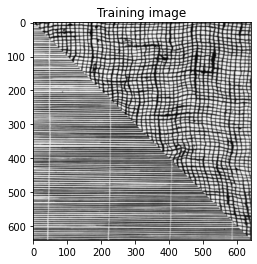

In [5]:
plt.title('Training image')
plt.imshow(train_img, cmap='gray')
plt.show()

2) Computing feature image

In [26]:
sigmas = [1,2,4]
train_fimg = toolbox.features.get_gauss_feat_multi(train_img, sigmas)
train_fimg.shape

/Users/williammarstrand/privat/DTU/Kandidat/1. Semester/Advanced Image Analysis/02506-advanced-image-analysis/exercises/week3/../../toolbox/features.py:36: RuntimeWarning: invalid value encountered in true_divide
  imfeat /= np.std(imfeat, axis=(0,1))


(409600, 3, 15)

3) Displaying selected layers of feature image

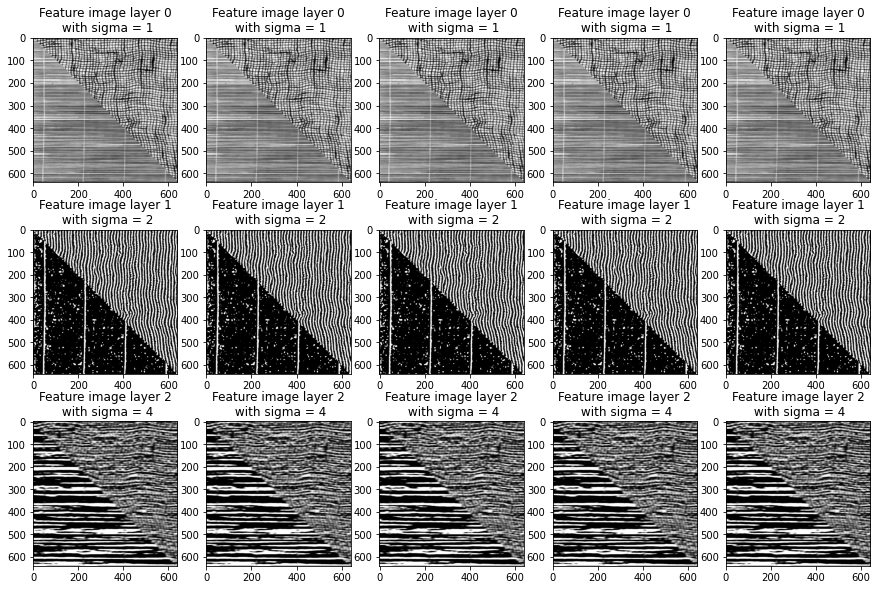

In [28]:
layers = [0, 1, 5, 10, 15]

fig, ax = plt.subplots(3, 5, figsize=(15,10))

for i in range(train_fimg.shape[1]):
    for j,l in enumerate(layers):
        ax[i, j].set_title(f'Feature image layer {i}\n with sigma = {sigmas[i]}')
        ax[i, j].imshow(train_fimg[:,i,i].reshape(train_img.shape), cmap='gray')

plt.show()

4) Transform feature vector from (r\*c, n , 15) to (r\*c,15n)
    - Each row will be a feature vector of size 15n

In [29]:
transformed_train_fimg = train_fimg.reshape(train_fimg.shape[0], train_fimg.shape[1]*train_fimg.shape[2])
transformed_train_fimg.shape

(409600, 45)

### (B)  Prepare labels for clustering

Loading training label image

In [31]:
train_label_img = skimage.io.imread(os.path.join('data', '2labels', 'training_labels.png'))
train_label_img.shape

(640, 640)

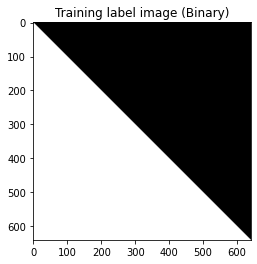

In [33]:
plt.title('Training label image (Binary)')
plt.imshow(train_label_img, cmap='gray')
plt.show()

Transforming training_label image to label probability image

In [40]:
labels = np.asarray(list(set(train_label_img.flatten().tolist())))
labels

array([  0, 255])

In [43]:
label_probability_img = np.vectorize(lambda cell: cell == labels)(train_label_img)
label_probability_img.shape

ValueError: setting an array element with a sequence.